In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [2]:
with open('./datasets/X_samples.pickle', 'rb') as f:
    X_samples = pickle.load(f)

In [3]:
X_samples

{'Raw':             Time        V1        V2        V3        V4        V5        V6  \
 143144  0.005428 -0.540939  0.637584  2.439590  1.316115  0.742650  1.671102   
 258914  0.871545  1.923123 -1.555096  0.211476 -0.174906 -1.760650  0.456333   
 51111  -0.468709 -1.939810 -1.039497  0.429346 -0.198014  2.693946 -2.792994   
 146949  0.038652 -0.801246  1.067120  0.506310 -2.533708  0.597024 -1.446026   
 135606 -0.039556 -0.280807  1.109719  0.944761 -0.132693  0.423860 -0.509289   
 ...          ...       ...       ...       ...       ...       ...       ...   
 221661  0.680894 -1.196213  1.679891 -0.939175 -1.133975  0.521005 -0.211571   
 129871 -0.064169  1.175454 -0.001898  1.235163  1.395858 -0.990710 -0.272728   
 185352  0.492710  0.465324 -3.487401 -4.042365 -0.107532  0.022031 -0.114303   
 61180  -0.411119 -0.383532  0.981614  1.235659  0.025899  0.081234 -0.545057   
 88583  -0.264218  1.108338 -0.152494  0.987418  1.017217 -0.395630  0.992727   
 
               V7  

In [4]:
X_samples['Raw']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
143144,0.005428,-0.540939,0.637584,2.439590,1.316115,0.742650,1.671102,0.280149,0.293844,0.026988,...,-0.055148,-0.270409,-0.238482,-0.338757,-1.002661,-0.060379,-0.276043,-0.001160,-0.093342,-0.296793
258914,0.871545,1.923123,-1.555096,0.211476,-0.174906,-1.760650,0.456333,-1.652432,0.375407,0.892833,...,-0.579051,-0.393833,-0.502683,0.288658,-0.366769,-0.662372,0.528734,0.010908,-0.041962,0.565919
51111,-0.468709,-1.939810,-1.039497,0.429346,-0.198014,2.693946,-2.792994,-0.279832,0.114651,-0.089721,...,0.138139,0.194420,-0.143151,0.354888,0.213072,-0.471635,-0.058909,0.034189,0.240607,-0.296793
146949,0.038652,-0.801246,1.067120,0.506310,-2.533708,0.597024,-1.446026,1.376331,-0.269470,0.208041,...,0.057025,-0.315741,-0.753499,-0.129894,-0.093705,-0.003377,0.381592,0.337806,0.223898,-0.237546
135606,-0.039556,-0.280807,1.109719,0.944761,-0.132693,0.423860,-0.509289,0.698370,-0.020385,-0.333794,...,0.138997,-0.319014,-0.844576,-0.118004,-0.520341,-0.049944,0.124567,0.244372,0.089572,-0.253336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221661,0.680894,-1.196213,1.679891,-0.939175,-1.133975,0.521005,-0.211571,0.487446,0.500638,0.364638,...,0.398187,-0.355852,-0.736666,0.026512,-1.180159,-0.157482,0.214005,0.537133,0.274390,-0.181793
129871,-0.064169,1.175454,-0.001898,1.235163,1.395858,-0.990710,-0.272728,-0.605885,0.103581,0.808439,...,-0.181618,0.113552,0.484107,-0.077394,0.392133,0.488166,-0.239944,0.064726,0.033867,-0.293440
185352,0.492710,0.465324,-3.487401,-4.042365,-0.107532,0.022031,-0.114303,1.643338,-0.613263,-1.390360,...,1.341593,0.437768,-0.345125,-1.040591,-0.302842,0.278728,0.936681,-0.314914,0.057967,13.110878
61180,-0.411119,-0.383532,0.981614,1.235659,0.025899,0.081234,-0.545057,0.540779,0.146734,-0.180970,...,-0.010394,-0.252749,-0.692668,0.032347,-0.016713,-0.282244,0.106386,0.252681,0.091742,-0.255991


In [4]:
with open('./datasets/X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

In [5]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201810,0.579847,-0.011862,1.035499,-0.317540,0.216728,1.201270,-0.537323,1.319719,-0.189181,-0.627079,...,-0.286629,0.166828,0.550873,-0.323683,-0.402491,0.195611,-0.573086,-0.079200,0.015847,-0.254035
264506,0.901937,2.267601,-1.634754,-2.368609,-2.592182,1.161092,3.434814,-1.615728,0.797080,-1.404452,...,-0.343678,-0.163936,-0.078568,0.259323,0.687408,-0.131926,-0.141368,0.026772,-0.055990,0.041920
63736,-0.397573,1.118301,-1.260762,0.981093,-0.380698,-1.876228,-0.490142,-1.089500,0.062601,0.119233,...,0.227343,0.364685,0.773901,-0.193256,0.415118,0.360261,-0.054869,0.016690,0.043857,1.553832
241327,0.778757,2.063018,0.608260,-3.168853,0.618313,1.228515,-1.367266,0.683151,-0.308130,-0.147176,...,-0.155587,-0.022321,0.076885,-0.042470,0.578092,0.345450,0.660782,-0.089294,-0.023863,-0.296793
271841,0.940836,-1.212528,0.730185,1.549615,-0.954037,0.008643,-0.092019,0.124386,0.595537,-0.570630,...,-0.012042,-0.161695,-0.744489,-0.173554,-0.405409,0.217600,0.357895,-0.143519,-0.050795,0.034654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33774,-0.555822,-0.959056,0.680588,1.852983,-0.466672,-0.308082,0.918903,-0.241535,0.316463,0.966254,...,0.110969,0.264748,0.931804,-0.156973,-0.833486,-0.695528,0.385264,-0.051860,0.045127,-0.097813
227794,0.711157,1.989666,-0.473633,-0.273621,0.516038,-0.882312,-0.659389,-0.640484,-0.051167,1.312968,...,-0.227229,0.190113,0.754381,0.139265,0.097753,-0.242066,0.612443,-0.026279,-0.049743,-0.161112
79089,-0.315253,1.152588,-1.246079,0.746174,-0.284243,-1.269832,0.738593,-1.023752,0.275181,0.220590,...,-0.326670,-0.814786,-1.677310,0.015347,-0.472647,0.137366,0.840058,-0.024022,0.010861,0.980926
54039,-0.451462,1.151073,-1.081038,1.115769,-0.528009,-1.251385,0.926480,-1.362322,0.490520,-0.075082,...,0.031199,0.124014,0.479044,0.032247,-0.267063,0.180255,-0.204127,0.074980,0.012729,0.259205


In [6]:
with open('./datasets/y_samples.pickle', 'rb') as f:
    y_samples = pickle.load(f)

In [7]:
y_samples

{'Raw': 143144    0
 258914    0
 51111     0
 146949    0
 135606    0
          ..
 221661    0
 129871    0
 185352    0
 61180     0
 88583     0
 Name: Class, Length: 227845, dtype: int64,
 'SMOTE': 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 454889    1
 454890    1
 454891    1
 454892    1
 454893    1
 Name: Class, Length: 454894, dtype: int64,
 'ADASYN': 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 454895    1
 454896    1
 454897    1
 454898    1
 454899    1
 Name: Class, Length: 454900, dtype: int64,
 'CNN': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1301    1
 1302    1
 1303    1
 1304    1
 1305    1
 Name: Class, Length: 1306, dtype: int64,
 'SMOTE + ENN': 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 454498    1
 454499    1
 454500    1
 454501    1
 454502    1
 Name: Class, Length: 454503, dtype: int64,
 'ADASYN + ENN': 0         0
 1         0

In [8]:
with open('./datasets/y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [9]:
y_test

201810    0
264506    0
63736     0
241327    0
271841    0
         ..
33774     0
227794    0
79089     0
54039     0
279170    0
Name: Class, Length: 56962, dtype: int64

In [10]:
data_list = ['Raw', 'SMOTE', 'ADASYN', 'CNN', 'SMOTE + ENN', 'ADASYN + ENN']

In [11]:
cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC_AUC']

In [12]:
X_samples.get(data_list[0])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
143144,0.005428,-0.540939,0.637584,2.439590,1.316115,0.742650,1.671102,0.280149,0.293844,0.026988,...,-0.055148,-0.270409,-0.238482,-0.338757,-1.002661,-0.060379,-0.276043,-0.001160,-0.093342,-0.296793
258914,0.871545,1.923123,-1.555096,0.211476,-0.174906,-1.760650,0.456333,-1.652432,0.375407,0.892833,...,-0.579051,-0.393833,-0.502683,0.288658,-0.366769,-0.662372,0.528734,0.010908,-0.041962,0.565919
51111,-0.468709,-1.939810,-1.039497,0.429346,-0.198014,2.693946,-2.792994,-0.279832,0.114651,-0.089721,...,0.138139,0.194420,-0.143151,0.354888,0.213072,-0.471635,-0.058909,0.034189,0.240607,-0.296793
146949,0.038652,-0.801246,1.067120,0.506310,-2.533708,0.597024,-1.446026,1.376331,-0.269470,0.208041,...,0.057025,-0.315741,-0.753499,-0.129894,-0.093705,-0.003377,0.381592,0.337806,0.223898,-0.237546
135606,-0.039556,-0.280807,1.109719,0.944761,-0.132693,0.423860,-0.509289,0.698370,-0.020385,-0.333794,...,0.138997,-0.319014,-0.844576,-0.118004,-0.520341,-0.049944,0.124567,0.244372,0.089572,-0.253336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221661,0.680894,-1.196213,1.679891,-0.939175,-1.133975,0.521005,-0.211571,0.487446,0.500638,0.364638,...,0.398187,-0.355852,-0.736666,0.026512,-1.180159,-0.157482,0.214005,0.537133,0.274390,-0.181793
129871,-0.064169,1.175454,-0.001898,1.235163,1.395858,-0.990710,-0.272728,-0.605885,0.103581,0.808439,...,-0.181618,0.113552,0.484107,-0.077394,0.392133,0.488166,-0.239944,0.064726,0.033867,-0.293440
185352,0.492710,0.465324,-3.487401,-4.042365,-0.107532,0.022031,-0.114303,1.643338,-0.613263,-1.390360,...,1.341593,0.437768,-0.345125,-1.040591,-0.302842,0.278728,0.936681,-0.314914,0.057967,13.110878
61180,-0.411119,-0.383532,0.981614,1.235659,0.025899,0.081234,-0.545057,0.540779,0.146734,-0.180970,...,-0.010394,-0.252749,-0.692668,0.032347,-0.016713,-0.282244,0.106386,0.252681,0.091742,-0.255991


In [13]:
y_samples.get(data_list[0])

143144    0
258914    0
51111     0
146949    0
135606    0
         ..
221661    0
129871    0
185352    0
61180     0
88583     0
Name: Class, Length: 227845, dtype: int64

## XGBoost Classifier

In [14]:
xgboost = XGBClassifier()

In [15]:
data_dict = {}
for i in data_list:
    print(i)
    xgboost.fit(X_samples.get(data_list[data_list.index(i)]), y_samples.get(data_list[data_list.index(i)]))
    y_pred = xgboost.predict(X_test)
    y_proba = xgboost.predict_proba(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    
    data_dict[i] = [acc, precision, recall, f1, roc_auc]
print(data_dict)

Raw
SMOTE
ADASYN
CNN
SMOTE + ENN
ADASYN + ENN
{'Raw': [0.9995611109160493, 0.9726027397260274, 0.7553191489361702, 0.8502994011976047, 0.9783545021767468], 'SMOTE': [0.9888873283943682, 0.11773049645390071, 0.8829787234042553, 0.2077596996245307, 0.9815096251266464], 'ADASYN': [0.9641164284961904, 0.04096045197740113, 0.925531914893617, 0.07844905320108204, 0.9813036610351108], 'CNN': [0.9994557775359011, 0.8539325842696629, 0.8085106382978723, 0.8306010928961749, 0.9669720397665965], 'SMOTE + ENN': [0.9885186615638496, 0.11538461538461539, 0.8936170212765957, 0.20437956204379562, 0.9839624872231176], 'ADASYN + ENN': [0.9639935395526843, 0.04082590333176912, 0.925531914893617, 0.07820224719101122, 0.9791989362450407]}


In [16]:
df_xgboost = pd.DataFrame(data_dict, index = cols)
df_xgboost

,Raw,SMOTE,ADASYN,CNN,SMOTE + ENN,ADASYN + ENN
Accuracy,0.999561,0.988887,0.964116,0.999456,0.988519,0.963994
Precision,0.972603,0.117730,0.040960,0.853933,0.115385,0.040826
Recall,0.755319,0.882979,0.925532,0.808511,0.893617,0.925532
F1-Score,0.850299,0.207760,0.078449,0.830601,0.204380,0.078202
ROC_AUC,0.978355,0.981510,0.981304,0.966972,0.983962,0.979199


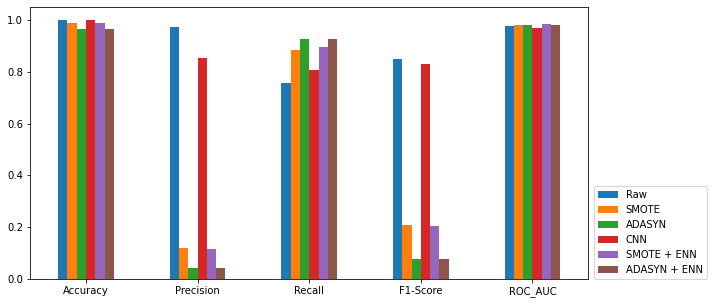

In [17]:
df_xgboost.plot(kind = 'bar', figsize = (10, 5))
plt.legend(loc=(1.01, 0.))
plt.xticks(rotation = 0)
plt.show()